# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn (extra credit)
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [1]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
from get_citibike_data import get_citibike_data

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
#import json
#s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)



Populating the interactive namespace from numpy and matplotlib


# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [27]:
filename1 = "201802-citibike-tripdata.csv"  # Get two months of data---February and July 2018
filename2 = "201807-citibike-tripdata.csv"
get_citibike_data(filename1)
get_citibike_data(filename2)

PUIDATA=/nfshome/aaw329/PUIdata
Successfully acquired data
PUIDATA=/nfshome/aaw329/PUIdata
Successfully acquired data


In [28]:
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + filename1)
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + filename2)
df = df1.append(df2, ignore_index=True)  # Put both datasets into a single DataFrame

In [29]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,771,2018-02-01 00:14:16.4120,2018-02-01 00:27:08.2290,72,W 52 St & 11 Ave,40.767272,-73.993929,379,W 31 St & 7 Ave,40.749156,-73.991600,14536,Subscriber,1952,1,2018-02-01 00:14:16.412
1,264,2018-02-01 05:14:45.1790,2018-02-01 05:19:09.6860,72,W 52 St & 11 Ave,40.767272,-73.993929,478,11 Ave & W 41 St,40.760301,-73.998842,32820,Subscriber,1965,1,2018-02-01 05:14:45.179
2,819,2018-02-01 06:48:55.2290,2018-02-01 07:02:35.0290,72,W 52 St & 11 Ave,40.767272,-73.993929,405,Washington St & Gansevoort St,40.739323,-74.008119,16131,Subscriber,1968,1,2018-02-01 06:48:55.229
3,646,2018-02-01 07:12:50.1740,2018-02-01 07:23:36.5280,72,W 52 St & 11 Ave,40.767272,-73.993929,2006,Central Park S & 6 Ave,40.765909,-73.976342,20831,Subscriber,1990,2,2018-02-01 07:12:50.174
4,1312,2018-02-01 07:46:48.8750,2018-02-01 08:08:41.5430,72,W 52 St & 11 Ave,40.767272,-73.993929,435,W 21 St & 6 Ave,40.741740,-73.994156,15899,Subscriber,1957,1,2018-02-01 07:46:48.875


In [30]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

# SPLIT BY CATEGORY

Let's split the data into night and day rides to look at the time durations of each

**$H_0$: there is no statistical difference in the time duration of nighttime rides and daytime rides**
$$ \alpha = 0.05 $$


In [31]:
nightfall = datetime.time(20, 0, 0)  # Let's call 8:00 pm nightfall
dawn      = datetime.time(5, 0, 0)   # and 5:00 am dawn

df['nightride'] = df['date'].apply(lambda t: t.time() >= nightfall or t.time() < dawn)

df['nightride_duration'] = df['tripduration'][(df['usertype'] == 'Subscriber') & df['nightride']]
df['dayride_duration'] = df['tripduration'][(df['usertype'] == 'Subscriber') & (~df['nightride'])]  # Use bitwise not!!


In [32]:
#dropping some data I no longer need
df.drop(df.columns.difference(['nightride_duration','dayride_duration']), 1, inplace=True)
df.head()

,nightride_duration,dayride_duration
0,771.0,NaN
1,NaN,264.0
2,NaN,819.0
3,NaN,646.0
4,NaN,1312.0


In [33]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,nightride_duration,dayride_duration
count,3.434940e+05,2.095008e+06
mean,7.994075e+02,8.042203e+02
std,5.397330e+03,1.332983e+04
min,6.100000e+01,6.100000e+01
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,2.075652e+06,1.358628e+07


In [34]:
# dropping NaN values
df['nightride_duration'].dropna(inplace= True)
df['dayride_duration'].dropna(inplace= True)

lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

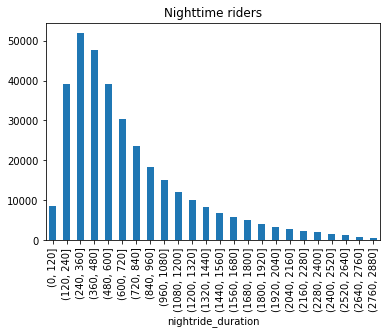

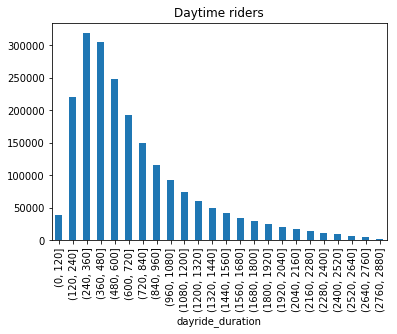

In [45]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
#bins = np.arange(10, 99, 5)
bins = np.arange(0, 3000, 120)  # 25 bins
axN = df.nightride_duration.groupby(pd.cut(df.nightride_duration, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axN.set_title("Nighttime riders")
axD = df.dayride_duration.groupby(pd.cut(df.dayride_duration, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axD.set_title("Daytime riders");


**Figure 1: histogrammed distribution of riders' ages by gender **
The distributions look largely similar, but notice the scale of the y-axis. There are way more rides taken during the day.

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

                    count_nonzero
nightride_duration               
(0, 120]                 0.006203
(120, 240]               0.015210
(240, 360]               0.014353
(360, 480]               0.008116
(480, 600]               0.003667
(600, 720]               0.000381
(720, 840]               0.002127
(840, 960]               0.003681
(960, 1080]              0.004390
(1080, 1200]             0.004965
(1200, 1320]             0.004557
(1320, 1440]             0.004166
(1440, 1560]             0.003901
(1560, 1680]             0.003488
(1680, 1800]             0.003001
(1800, 1920]             0.002643
(1920, 2040]             0.002540
(2040, 2160]             0.002084
(2160, 2280]             0.001684
(2280, 2400]             0.001434
(2400, 2520]             0.001010
(2520, 2640]             0.000693
(2640, 2760]             0.000288
(2760, 2880]             0.000000


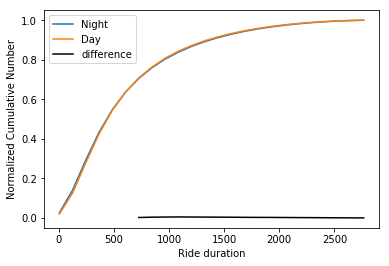

In [46]:
#print df.ageS, df.ageS.cumsum()

csN=df.nightride_duration.groupby(pd.cut(df.nightride_duration, bins)).agg([count_nonzero]).cumsum()

csD=df.dayride_duration.groupby(pd.cut(df.dayride_duration, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csN / csN.max()-csD / csD.max()))

pl.plot(bins[:-1] + 5, csN / csN.max(), label = "Night")
pl.plot(bins[:-1] + 5, csD / csD.max(), label = "Day")
pl.plot(bins[:-1] + 5, np.sqrt(csD / csD.max() - csN / csN.max())**2, 'k-',
        label = "difference")
pl.xlabel("Ride duration")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [48]:
import scipy.stats
#remember that your imports should all be at the top. I leave it here to hightlight that this package is needed at this point of the workflow

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [49]:
ks = scipy.stats.ks_2samp(df.nightride_duration, df.dayride_duration)
print (ks)

Ks_2sampResult(statistic=0.015852108997544551, pvalue=7.2447811202793168e-65)


**  FILL IN THE CELL BELOW!**


The Kolmogorov-Smirnov test does not allow us to reject the null hypothesis because, according to the documentation, we are not able to reject the null hypothesis if the p-value is high, which is the case.




The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

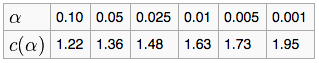

In [16]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image(filename="../plotsforclasses/ks2sample_table.png")

In [51]:
# Reduce the dataset to a random subset of 200 samples, with a fixed random state for reproducibility
df_samp = df.sample(200, random_state=4567)
ks = scipy.stats.ks_2samp(df_samp.nightride_duration, df_samp.dayride_duration)
print (ks)

Ks_2sampResult(statistic=0.59999999999999998, pvalue=1.6114175160268606e-32)


This p-value is not exceedingly large, so it does not preclude rejection of the null hypothesis, but it does exceed the critical value for our chosen significance $\alpha = 0.05: c(\alpha) = 1.36 $. Therefore, we can reject the null hypothesis with $p < 0.05$.

# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [72]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis

sample_size = 500  # The documentation recommends a size large than 500 or so for a more reliable p-value

df_p_night = df['nightride_duration'][(df['nightride_duration'] != NaN)]
df_p_night = df_p_night.sample(sample_size, random_state=123)
df_p_night = df_p_night.sort_values()

df_p_day = df['dayride_duration'][(df['dayride_duration'] != NaN)]
df_p_day = df_p_day.sample(sample_size, random_state=123)
df_p_day = df_p_day.sort_values()

# Now, the values should be sorted and both DataFrames are of the same shape
print("Same shape? %s!" % (df_p_night.shape == df_p_day.shape))

Same shape? True!


**$H_0$: there is no significant correlation between the time duration of nighttime rides and daytime rides**
$$ \alpha = 0.05 $$

In [73]:
scipy.stats.pearsonr(df_p_night, df_p_day)

(0.40169957685789309, 8.2184848963336111e-21)

The p-value found from the `pearsonr` function "indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets" (from the SciPy documentation), so we can reject our null hypothesis if $1-p$ exceeds the critical value. Our p-value is very small, so we can reject our null hypothesis.

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [74]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis

scipy.stats.spearmanr(df_p_night, df_p_day)  # Use the same data as for Pearson's correlation test


SpearmanrResult(correlation=0.99999443195082727, pvalue=0.0)

** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**

For both tests, the corelation coefficient (the first number returned), indicates a positive correlation because it is greater than 0. A number close to 0 or 0 itself would indicate no or low correlation. Likewise, for both results a low p-value was obtained in addition to the corellation coefficient, which indicates a high likelihood that the two datasets are correlated.